## Logistic Regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set
from model.logistic import LogisticRegression


In [8]:
#Q5 - (a) - added in logistic.py
def select_binarydata(dataset, class_a,class_b):
    Data, labels = dataset
    print(np.shape(Data),np.shape(labels))
    #only save class a, and class b.
    idx_class_a = np.where(labels == class_a)
    idx_class_b = np.where(labels == class_b)
    Data_class_a = Data[idx_class_a]
    Data_class_b = Data[idx_class_b]

    Data_ = np.concatenate([Data_class_a,Data_class_b])
    label_ = np.concatenate([labels[idx_class_a],labels[idx_class_b]])
    return   Data_ ,label_
    # Image : (cnt, 32x32 byte = 1024) in one img data , 1 byte in one image data


#Q5 - (b) - Evaluate the model on Speed limit 100km/h vs 120km/h using the unaligned dataset

In [10]:
print(len(load_data_binary[0]))

2550


(34799, 1024) (34799,)
[[ 22  22  25 ...  24  22  19]
 [226 226 226 ... 183 184 182]
 [ 30  54 158 ...  20  24  25]
 ...
 [ 79  73  73 ...  14  17  19]
 [ 32  31  30 ...  29  29  29]
 [ 19  19  21 ...  30  31  33]]
(2040, 1024)
(255, 1024)
(255, 1024)
(2040, 1024)


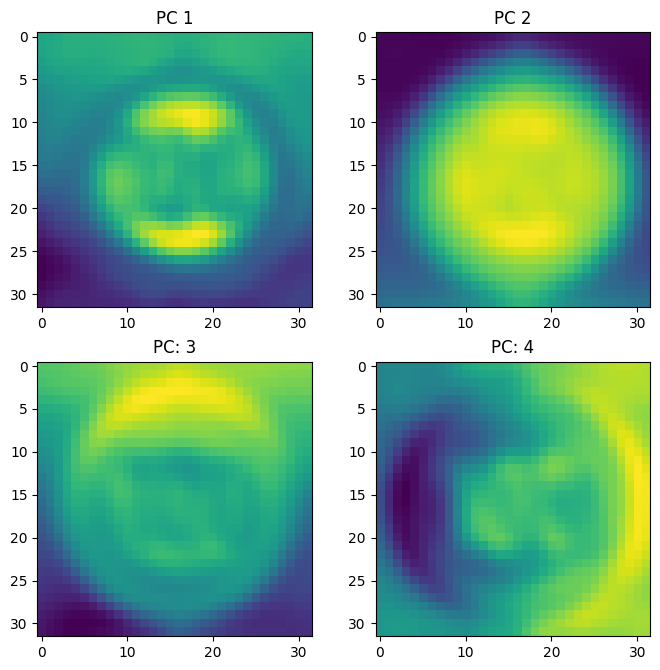

In [9]:
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(False) # check true and false
load_data_binary = select_binarydata(load_data,7,8)
#data splits 80/10/10
train_data, train_label, valid_data, valid_label, test_data, test_label = generate_no_fold_set(load_data_binary,10)
print(train_data)
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)
pca = PCA(n_components)
projected = pca.PCA_Emmet(train_data)
pca.plot_PC()


 train accuracy, loss: (0.5235294117647059, 1409.5319609665094)
 train accuracy, loss: (0.5078431372549019, 1543.1416700552836)
 train accuracy, loss: (0.492156862745098, 3085.4336327840356)
 train accuracy, loss: (0.5078431372549019, 6391.217016641674)
 train accuracy, loss: (0.492156862745098, 3775.2349188971843)
 train accuracy, loss: (0.5078431372549019, 6202.927915467821)
 train accuracy, loss: (0.492156862745098, 3944.3856367321023)
 train accuracy, loss: (0.5078431372549019, 6106.566071501486)
 train accuracy, loss: (0.492156862745098, 4026.370232621273)
 train accuracy, loss: (0.5078431372549019, 6051.230572695626)
 train accuracy, loss: (0.492156862745098, 4069.376437299507)
 train accuracy, loss: (0.5078431372549019, 6017.259773378921)
 train accuracy, loss: (0.492156862745098, 4092.085540232943)
 train accuracy, loss: (0.5078431372549019, 5995.177016533284)
 train accuracy, loss: (0.492156862745098, 4103.505500435276)
 train accuracy, loss: (0.5078431372549019, 5979.93146564

 train accuracy, loss: (0.492156862745098, 3878.1977637644745)
 train accuracy, loss: (0.5078431372549019, 5433.69669715985)
 train accuracy, loss: (0.492156862745098, 3876.3594532293437)
 train accuracy, loss: (0.5078431372549019, 5425.581269323406)
 train accuracy, loss: (0.492156862745098, 3874.5473668434392)
 train accuracy, loss: (0.5078431372549019, 5417.435980870076)
 train accuracy, loss: (0.492156862745098, 3872.761130273224)
 train accuracy, loss: (0.5078431372549019, 5409.261113659286)
 train accuracy, loss: (0.492156862745098, 3871.000362081346)
 train accuracy, loss: (0.5078431372549019, 5401.056955061356)
 train accuracy, loss: (0.492156862745098, 3869.2646737140794)
 train accuracy, loss: (0.5078431372549019, 5392.823797964267)
 train accuracy, loss: (0.492156862745098, 3867.5536694932352)
 train accuracy, loss: (0.5078431372549019, 5384.561940776758)
 train accuracy, loss: (0.492156862745098, 3865.8669466125907)
 train accuracy, loss: (0.5078431372549019, 5376.271687427

 train accuracy, loss: (0.5078431372549019, 4832.0167423638795)
 train accuracy, loss: (0.492156862745098, 3787.676316021104)
 train accuracy, loss: (0.5078431372549019, 4822.7464025162735)
 train accuracy, loss: (0.492156862745098, 3786.4537454143156)
 train accuracy, loss: (0.5078431372549019, 4813.474397186335)
 train accuracy, loss: (0.492156862745098, 3785.219643471026)
 train accuracy, loss: (0.5078431372549019, 4804.201156246488)
 train accuracy, loss: (0.492156862745098, 3783.9734549592945)
 train accuracy, loss: (0.5078431372549019, 4794.927104826866)
 train accuracy, loss: (0.49264705882352944, 3782.7146318446535)
 train accuracy, loss: (0.5078431372549019, 4785.6526630829185)
 train accuracy, loss: (0.49264705882352944, 3781.44263363395)
 train accuracy, loss: (0.5078431372549019, 4776.3782459675895)
 train accuracy, loss: (0.49264705882352944, 3780.1569277131393)
 train accuracy, loss: (0.5078431372549019, 4767.104263009007)
 train accuracy, loss: (0.49264705882352944, 3778

 train accuracy, loss: (0.5102941176470588, 4041.224036188764)
 train accuracy, loss: (0.4980392156862745, 3599.3545993054745)
 train accuracy, loss: (0.5107843137254902, 4032.710305211006)
 train accuracy, loss: (0.4985294117647059, 3596.144771930848)
 train accuracy, loss: (0.5107843137254902, 4024.208075377134)
 train accuracy, loss: (0.4985294117647059, 3592.913435448264)
 train accuracy, loss: (0.5107843137254902, 4015.717325407148)
 train accuracy, loss: (0.4985294117647059, 3589.660772680295)
 train accuracy, loss: (0.5107843137254902, 4007.2380343764376)
 train accuracy, loss: (0.4985294117647059, 3586.3869667389017)
 train accuracy, loss: (0.5107843137254902, 3998.7701817973348)
 train accuracy, loss: (0.49901960784313726, 3583.0922008873667)
 train accuracy, loss: (0.5107843137254902, 3990.313747695549)
 train accuracy, loss: (0.49950980392156863, 3579.7766584101646)
 train accuracy, loss: (0.5107843137254902, 3981.8687126817504)
 train accuracy, loss: (0.49950980392156863, 3

 train accuracy, loss: (0.5117647058823529, 3345.033635056419)
 train accuracy, loss: (0.5176470588235295, 3488.133304980385)
 train accuracy, loss: (0.5127450980392156, 3340.7544083460803)
 train accuracy, loss: (0.5171568627450981, 3480.39870614851)
 train accuracy, loss: (0.513235294117647, 3336.4643079324724)
 train accuracy, loss: (0.5171568627450981, 3472.6762703844515)
 train accuracy, loss: (0.5137254901960784, 3332.1634705438537)
 train accuracy, loss: (0.5166666666666667, 3464.966035154878)
 train accuracy, loss: (0.5137254901960784, 3327.852032673443)
 train accuracy, loss: (0.5166666666666667, 3457.2680383203624)
 train accuracy, loss: (0.5142156862745098, 3323.5301305873354)
 train accuracy, loss: (0.5166666666666667, 3449.5823181167657)
 train accuracy, loss: (0.5142156862745098, 3319.197900331701)
 train accuracy, loss: (0.5166666666666667, 3441.9089131368055)
 train accuracy, loss: (0.5142156862745098, 3314.8554777384725)
 train accuracy, loss: (0.5166666666666667, 3434

 train accuracy, loss: (0.5338235294117647, 2884.649810405227)
 train accuracy, loss: (0.5416666666666666, 2955.4586995959717)
 train accuracy, loss: (0.5338235294117647, 2878.074289617961)
 train accuracy, loss: (0.542156862745098, 2950.7146654010394)
 train accuracy, loss: (0.5343137254901961, 2871.5140078905433)
 train accuracy, loss: (0.5426470588235294, 2945.9701425078433)
 train accuracy, loss: (0.5343137254901961, 2864.9689877269734)
 train accuracy, loss: (0.5426470588235294, 2941.225228217195)
 train accuracy, loss: (0.5348039215686274, 2858.4392511103806)
 train accuracy, loss: (0.5426470588235294, 2936.480019055469)
 train accuracy, loss: (0.5352941176470588, 2851.9248195008345)
 train accuracy, loss: (0.5431372549019607, 2931.7346107719873)
 train accuracy, loss: (0.5352941176470588, 2845.4257138334233)
 train accuracy, loss: (0.5431372549019607, 2926.989098337132)
 train accuracy, loss: (0.5352941176470588, 2838.941954516612)
 train accuracy, loss: (0.5431372549019607, 292

 train accuracy, loss: (0.5740196078431372, 2640.5926423181054)
 train accuracy, loss: (0.5583333333333333, 2472.9255596569083)
 train accuracy, loss: (0.5745098039215686, 2635.99397398735)
 train accuracy, loss: (0.5588235294117647, 2467.4111085039513)
 train accuracy, loss: (0.575, 2631.3996549840867)
 train accuracy, loss: (0.5588235294117647, 2461.9122361119576)
 train accuracy, loss: (0.575, 2626.8097339710803)
 train accuracy, loss: (0.5593137254901961, 2456.428930554819)
 train accuracy, loss: (0.5764705882352941, 2622.2242590248507)
 train accuracy, loss: (0.5593137254901961, 2450.9611794744183)
 train accuracy, loss: (0.5769607843137254, 2617.6432776409783)
 train accuracy, loss: (0.5598039215686275, 2445.508970083808)
 train accuracy, loss: (0.5774509803921568, 2613.0668367392127)
 train accuracy, loss: (0.5602941176470588, 2440.072289170599)
 train accuracy, loss: (0.5774509803921568, 2608.494982668853)
 train accuracy, loss: (0.5602941176470588, 2434.651123100308)
 train ac

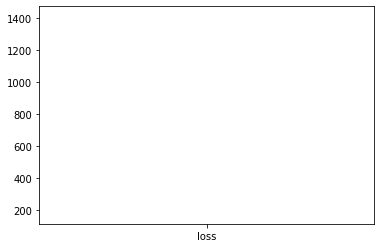

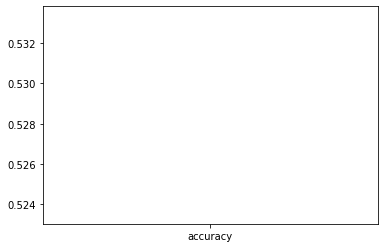

In [4]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
train_l = np.copy(train_label)//8 # 7 or 8
valid_l = np.copy(valid_label)//8 # 7 or 8

Alpha = 0.01
w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)
#weight
train_d = projected 
valid_d = pca.PCA_generate(valid_data)
test_d = pca.PCA_generate(test_data)
for epoch in range(1000):
    #logistic model 
    train_y = logistic.logistic_model(w, train_d)
    #loss check
    train_loss = logistic.loss_binary(train_y, train_l)
    #gradient check
    train_loss_record.append(train_loss)
    train_accuracy = logistic.check_accuracy(train_y, train_l)
    train_accuracy_record.append(train_accuracy)
    #process for validation sets only checking the accuray, not updating the weight
    holdout_y = logistic.logistic_model(w,valid_d)
    holdout_loss = logistic.loss_binary(holdout_y, valid_l)
    holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
    holdout_loss_record.append(holdout_loss)
    holdout_accuracy_record.append(holdout_accuracy)
    #evaluate best option for test sets
    '''
    if max(holdout_accuracy_record[0]) == holdout_accuracy:
        test_y = logistic.logistic_model(pjt_test_data)
        test_accuracy_record = logistic.check_accuracy(test_y, test_labels)
    '''
    #update the weight
    w = logistic.update_weight(w,train_d, train_y, train_l)
    
    
    print(f' train accuracy, loss: {train_accuracy,train_loss }')
plt.figure(1)
plt.plot('loss', train_loss_record[0], holdout_loss_record[0])
plt.figure(2)
plt.plot('accuracy', train_accuracy_record[0], holdout_accuracy_record[0])

#Q5 - (c) - Evaluate the model on Speed limit 100km/h vs 120km/h using the aligned dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set
from model.logistic import LogisticRegression

#Q5 - (a) - added in logistic.py
def select_binarydata(dataset, class_a,class_b):
    Data, labels = dataset
    print(np.shape(Data),np.shape(labels))
    #only save class a, and class b.
    idx_class_a = np.where(labels == class_a)
    idx_class_b = np.where(labels == class_b)
    Data_class_a = Data[idx_class_a]
    Data_class_b = Data[idx_class_b]

    Data_ = np.concatenate([Data_class_a,Data_class_b])
    label_ = np.concatenate([labels[idx_class_a],labels[idx_class_b]])
    return   Data_ ,label_
    # Image : (cnt, 32x32 byte = 1024) in one img data , 1 byte in one image data

    
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(True) # check true and false
load_data_binary = select_binarydata(load_data,7,8)
#data splits 80/10/10


(34799, 1024) (34799,)


**********
(2040, 1024)


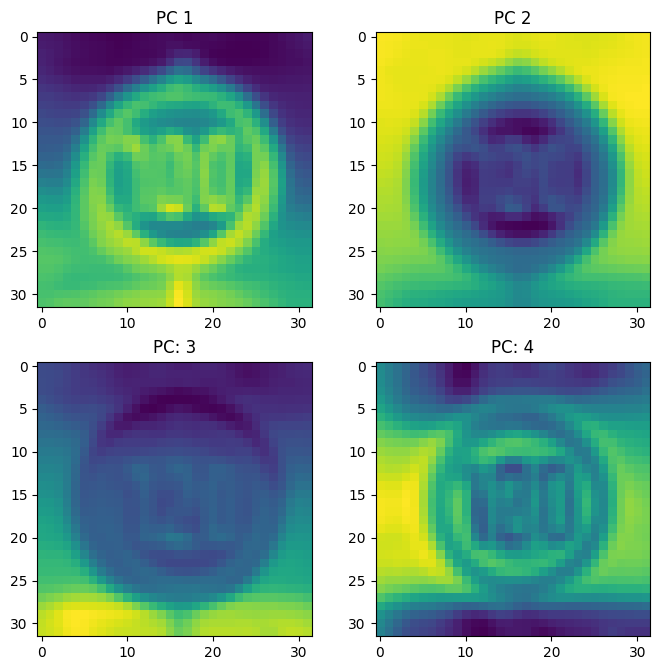

 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(2805, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(3060, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(3315, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(3570, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(3825, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********


KeyboardInterrupt: 

In [10]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
Alpha = 0.01
w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)

#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    n_components = 100
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test
    
    train_l = np.copy(train_label)//8
    valid_l = np.copy(valid_data)//8
    test_l = np.copy(test_data)//8
    
    pca = PCA(n_components)
    projected = pca.PCA_Emmet(train_data)
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.PCA_generate(valid_data)
    test_d = pca.PCA_generate(test_data)
    '''
    for epoch in range(300):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record.append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        
        if max(holdout_accuracy_record[k]) == holdout_accuracy:
            test_y = logistic.logistic_model(test_d)
            test_accuracy_record = logistic.check_accuracy(test_y, test_l)
        
        #update the weight
        w = logistic.update_weight(w,train_d, train_y, train_l)
    '''
    
    print(f' train accuracy, loss: {train_accuracy,train_loss }')
plt.figure(1)
plt.plot('loss', train_loss_record[0], holdout_loss_record[0])
plt.figure(2)
plt.plot('accuracy', train_accuracy_record[0], holdout_accuracy_record[0])

In [ ]:
##Q5 - (d) - Evaluate the model on Curve Left(19) vs Right(20) using the aligned dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set
from model.logistic import LogisticRegression

#Q5 - (a) - added in logistic.py
def select_binarydata(dataset, class_a,class_b):
    Data, labels = dataset
    print(np.shape(Data),np.shape(labels))
    #only save class a, and class b.
    idx_class_a = np.where(labels == class_a)
    idx_class_b = np.where(labels == class_b)
    Data_class_a = Data[idx_class_a]
    Data_class_b = Data[idx_class_b]

    Data_ = np.concatenate([Data_class_a,Data_class_b])
    label_ = np.concatenate([labels[idx_class_a],labels[idx_class_b]])
    return   Data_ ,label_
    # Image : (cnt, 32x32 byte = 1024) in one img data , 1 byte in one image data

    
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(True) # check true and false
load_data_binary = select_binarydata(load_data,19,20)


(34799, 1024) (34799,)


**********
(384, 1024)


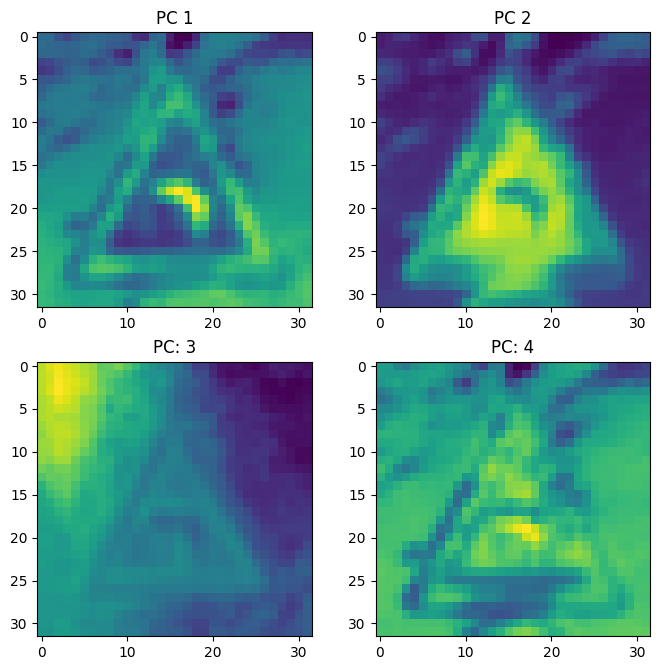

 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(528, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(576, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(624, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(672, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(720, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(768, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(816, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(864, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(912, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

In [13]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
Alpha = 0.01
w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)

#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    n_components = 100
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test
    
    train_l = np.copy(train_label)//8
    valid_l = np.copy(valid_data)//8
    test_l = np.copy(test_data)//8
    
    pca = PCA(n_components)
    projected = pca.PCA_Emmet(train_data)
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.PCA_generate(valid_data)
    test_d = pca.PCA_generate(test_data)
    '''
    for epoch in range(300):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record.append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        
        if max(holdout_accuracy_record[k]) == holdout_accuracy:
            test_y = logistic.logistic_model(test_d)
            test_accuracy_record = logistic.check_accuracy(test_y, test_l)
        
        #update the weight
        w = logistic.update_weight(w,train_d, train_y, train_l)
    '''
    
    print(f' train accuracy, loss: {train_accuracy,train_loss }')
'''
plt.figure(1)
plt.plot('loss', train_loss_record[0], holdout_loss_record[0])
plt.figure(2)
plt.plot('accuracy', train_accuracy_record[0], holdout_accuracy_record[0])
'''